# Ciência dos Dados - Projeto 1

## Vitor Liu - 2A
## Prof. Fabio Miranda

## Análise da relação entre a renda mensal, a quantidade de moradores por residência e a área residencial, e o uso de banda larga e 3G/4G em Minas Gerais.

## Introdução

Esse projeto tem como objetivo analisar, de acordo com as PNADs disponíveis, as diferentes caracteristicas da população de Minas Gerais em relação com o acesso à internet. Assim, é possível definir o perfil de domicílio modelo para possíveis investimentos em outros estados.

Como a área de residência, a quantidade de moradores e a renda mensal (em R$) influenciam nos diferentes servicos de Internet (3g/4g ou banda larga)?

## Filtragem e organização dos dados brutos

In [2]:
#Imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
#Local dos arquivos
print('Esperamos trabalhar no diretório:')
print(os.getcwd())

Esperamos trabalhar no diretório:
C:\Users\LiuSeeker\Desktop\2o Semestre\Ciência dos dados\CieDados\Projeto 1


In [4]:
def ledados(plan):
    dadosres = pd.DataFrame(pd.read_csv(plan))

    #Colunas escolhidas
    dadosres = dadosres.loc[:, ["UF","V02322","V4614","V4105","V0105","V02424","V02426"]]
    
    #Cria coluna "Área", com valores "urbana" e "rural"
    dadosres.loc[(dadosres.V4105==1), "Área"] = "Urbana"
    dadosres.loc[(dadosres.V4105==2), "Área"] = "Urbana"
    dadosres.loc[(dadosres.V4105==3), "Área"] = "Urbana"
    dadosres.loc[(dadosres.V4105==4), "Área"] = "Rural"
    dadosres.loc[(dadosres.V4105==5), "Área"] = "Rural"
    dadosres.loc[(dadosres.V4105==6), "Área"] = "Rural"
    dadosres.loc[(dadosres.V4105==7), "Área"] = "Rural"
    dadosres.loc[(dadosres.V4105==8), "Área"] = "Rural"
    del dadosres["V4105"]
    
    #Tirando linhas com valor NaN
    #dadosres = dadosres.dropna(how="any")
    dadosres = dadosres[pd.notnull(dadosres["UF"])]
    dadosres = dadosres[pd.notnull(dadosres["V02322"])]
    dadosres = dadosres[pd.notnull(dadosres["V4614"])]
    dadosres = dadosres[pd.notnull(dadosres["V0105"])]
    #dadosres = dadosres[pd.notnull(dadosres["V02424"])] #Justificativa da não remoção dos valores NaN abaixo
    #dadosres = dadosres[pd.notnull(dadosres["V02426"])] 

    #Muda as categorias das colunas
    dadosres["UF"] = dadosres["UF"].astype("category")
    dadosres["V02322"] = dadosres["V02322"].astype("category") #Internet
    dadosres["V4614"] = dadosres["V4614"].astype("int32") #Renda
    dadosres["V0105"] = dadosres["V0105"].astype("int32") #Total moradores
    dadosres["V02424"] = dadosres["V02424"].astype("category") #3g/4g
    dadosres["V02426"] = dadosres["V02426"].astype("category") #Banda larga
    
    #Define os nomes dos valores quantitativos
    dadosres["UF"].cat.categories = ["Rondonia","Acre","Amazonas","Roraima", \
    "Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
    "Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
    "São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal"]
    dadosres["V02322"].cat.categories = ["Tem", "Não tem"]
    dadosres["V02424"].cat.categories = ["Sim", "Não"]
    dadosres["V02426"].cat.categories = ["Sim", "Não"]
    
    #Mudança de nome das colunas
    dadosres = dadosres.rename(columns = {"V02322": "Internet", "V4614": "Renda mensal (R$)", "V0105": "Total de moradores", "V02424": "Internet 3G ou 4G", "V02426": "Internet banda larga"})
    
    #Exclusão de colunas com valores inválidos/não importantes
    dadosres = dadosres[dadosres["Renda mensal (R$)"]!=999999999999]
    dadosres = dadosres[dadosres["Renda mensal (R$)"]>=0]
    dadosres = dadosres[dadosres["UF"]=="Minas Gerais"]
    
    return(dadosres)

Justificativa dos valores NaN nas colunas "Internet 3G ou 4G" e "Internet banda larga":
A não remoção das linas com valores NaN nas colunas mencionadas se devem porque, caso fossem retirados, a coluna "Internet" ficaria apenas com valores "Tem".

In [5]:
dadosres15 = ledados("DOM2015.csv")
dadosres14 = ledados("DOM2014.csv")
dadosres13 = ledados("DOM2013.csv")

In [6]:
#Print de um ano (2015)
dadosres15

UF Internet  Renda mensal (R$)  Total de moradores  \
64876  Minas Gerais      Tem               3800                   2   
64877  Minas Gerais      Tem               2700                   6   
64880  Minas Gerais      Tem               1780                   2   
64881  Minas Gerais  Não tem               1576                   2   
64883  Minas Gerais      Tem               4488                   5   
64884  Minas Gerais      Tem                598                   5   
64885  Minas Gerais      Tem               3100                   4   
64886  Minas Gerais  Não tem               2538                   2   
64888  Minas Gerais      Tem               2376                   6   
64889  Minas Gerais      Tem                788                   3   
64890  Minas Gerais  Não tem               1300                   2   
64892  Minas Gerais      Tem               1200                   3   
64893  Minas Gerais  Não tem               1800                   1   
64894  Minas Gerais      Tem               2100                   4   
64895  Minas Gerais      Tem               1400                   3   
64898  Minas Gerais      Tem               3100                   3   
64899  Minas Gerais  Não tem                788                   1   
64900  Minas Gerais      Tem               2650                   4   
64901  Minas Gerais  Não tem                788                   1   
64902  Minas Gerais      Tem                155                   3   
64903  Minas Gerais      Tem               2165                   5   
64904  Minas Gerais  Não tem               1058                   4   
64906  Minas Gerais  Não tem               1988                   2   
64908  Minas Gerais  Não tem               1488                   2   
64909  Minas Gerais      Tem               1988                   4   
64910  Minas Gerais      Tem               1650                   4   
64911  Minas Gerais      Tem                988                   2   
64915  Minas Gerais  Não tem                888                   3   
64917  Minas Gerais  Não tem                858                   2   
64919  Minas Gerais  Não tem              14499                   2   
...             ...      ...                ...                 ...   
78818  Minas Gerais  Não tem               1480                   2   
78820  Minas Gerais  Não tem               3312                   4   
78821  Minas Gerais  Não tem               2056                   2   
78823  Minas Gerais  Não tem               1000                   4   
78824  Minas Gerais  Não tem               3526                   4   
78825  Minas Gerais  Não tem                972                   3   
78826  Minas Gerais  Não tem                800                   3   
78827  Minas Gerais  Não tem                788                   1   
78828  Minas Gerais  Não tem                400                   1   
78829  Minas Gerais  Não tem               1354                   5   
78830  Minas Gerais      Tem                500                   3   
78831  Minas Gerais  Não tem               1576                   4   
78832  Minas Gerais  Não tem               2100                   3   
78834  Minas Gerais  Não tem               1900                   4   
78836  Minas Gerais  Não tem                788                   1   
78838  Minas Gerais      Tem               1576                   2   
78839  Minas Gerais  Não tem               1576                   2   
78840  Minas Gerais      Tem               3000                   4   
78841  Minas Gerais  Não tem                788                   1   
78842  Minas Gerais  Não tem               1576                   2   
78843  Minas Gerais      Tem               1610                   1   
78844  Minas Gerais  Não tem               2710                   2   
78845  Minas Gerais      Tem               1100                   2   
78846  Minas Gerais  Não tem               1576                   3   
78847  Minas Gerais  Não tem             

## Criação de um DataFrame com index dos anos

In [7]:
#Criação de variáveis para criação de um DataFrame com index "Anos" (2013,2014,2015)
std13 = dadosres13["Renda mensal (R$)"].std()
std14 = dadosres14["Renda mensal (R$)"].std()
std15 = dadosres15["Renda mensal (R$)"].std()
mean13 = dadosres13["Renda mensal (R$)"].mean()
mean14 = dadosres14["Renda mensal (R$)"].mean()
mean15 = dadosres15["Renda mensal (R$)"].mean()
intersim13 = dadosres13["Internet"].value_counts(normalize=True)[0]
intersim14 = dadosres14["Internet"].value_counts(normalize=True)[0]
intersim15 = dadosres15["Internet"].value_counts(normalize=True)[0]
internao13 = dadosres13["Internet"].value_counts(normalize=True)[1]
internao14 = dadosres14["Internet"].value_counts(normalize=True)[1]
internao15 = dadosres15["Internet"].value_counts(normalize=True)[1]
tiponet113 = dadosres13["Internet 3G ou 4G"].value_counts(normalize=True)[0]
tiponet114 = dadosres14["Internet 3G ou 4G"].value_counts(normalize=True)[0]
tiponet115 = dadosres15["Internet 3G ou 4G"].value_counts(normalize=True)[0]
tiponet213 = dadosres13["Internet banda larga"].value_counts(normalize=True)[0]
tiponet214 = dadosres14["Internet banda larga"].value_counts(normalize=True)[0]
tiponet215 = dadosres15["Internet banda larga"].value_counts(normalize=True)[0]
urb13 = dadosres13["Área"].value_counts(normalize=True)[0]
urb14 = dadosres14["Área"].value_counts(normalize=True)[0]
urb15 = dadosres15["Área"].value_counts(normalize=True)[0]
rural13 = dadosres13["Área"].value_counts(normalize=True)[1]
rural14 = dadosres14["Área"].value_counts(normalize=True)[1]
rural15 = dadosres15["Área"].value_counts(normalize=True)[1]

In [8]:
#Criação do DataFrame
anos = ("2013", "2014", "2015")
medias = (mean13, mean14, mean15)
medianas = (std13, std14, std15)
netsim = (intersim13, intersim14, intersim15)
netnao = (internao13, internao14, internao15)
tiponet1 = (tiponet113, tiponet114, tiponet115)
tiponet2 = (tiponet213, tiponet214, tiponet215)
urb = (urb13, urb14, urb15)
rural = (rural13, rural14, rural15)
dadosres = pd.DataFrame({"Média renda mensal": medias,
                         "Mediana renda mensal": medianas,
                         "Tem Internet": netsim,
                         "Internet 3G/4G": tiponet1,
                         "Internet banda larga": tiponet2,
                         "Não tem internet": netnao,
                         "Urbano": urb,
                         "Rural": rural
                        }, index=anos)

#Print do novo DataFrame
dadosres

Internet 3G/4G  Internet banda larga  Mediana renda mensal  \
2013        0.446134              0.768589           3974.513734   
2014        0.633211              0.708287           5033.161736   
2015        0.707541              0.704977           4569.504946   

      Média renda mensal  Não tem internet     Rural  Tem Internet    Urbano  
2013         2989.080398          0.493472  0.131211      0.506528  0.868789  
2014         3188.750976          0.429233  0.130277      0.570767  0.869723  
2015         3325.010990          0.397820  0.129973      0.602180  0.870027

## Plot do gráfico histograma de Renda Mensal em 2014 como panorama geral

ValueError: bins must increase monotonically.

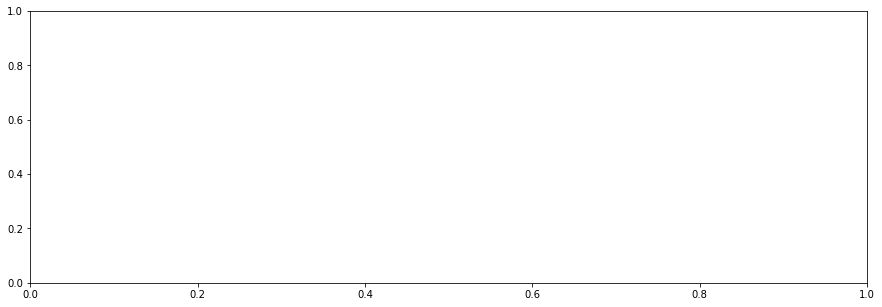

In [9]:
dadosres14["Renda mensal (R$)"].plot(kind="hist", bins=(0,20000,100), figsize=(15,5), title="Frequência da renda mensal (em R$) em 2014")
plt.xlabel("Renda mensal (R$)")
plt.ylabel("Frequência")

## Comparação entre o uso de internet em 2013 e 2015

In [10]:
#Criação de faixas de renda
faixa = np.arange(0,16000,1000)
rendacut = pd.cut(dadosres13["Renda mensal (R$)"], faixa, False)

### 1. Relação de uso de Internet

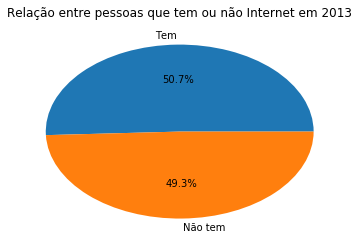

In [11]:
dadosres13["Internet"].value_counts().plot(kind="pie", title="Relação entre pessoas que tem ou não Internet em 2013", autopct='%1.1f%%')
plt.ylabel("")

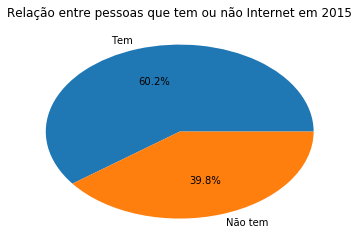

In [11]:
dadosres15["Internet"].value_counts().plot(kind="pie", title="Relação entre pessoas que tem ou não Internet em 2015", autopct='%1.1f%%')
plt.ylabel("")

### 2. Comparação entre o uso de banda larga e o total de pessoas por residência

pd.crosstab(dadosres13["Total de moradores"], dadosres13["Internet banda larga"]).plot(kind="bar")
plt.legend(["Tem banda larga", "Não tem banda larga"])
plt.xlim(0,9)
plt.xlabel("Total de moradores por residência")
plt.ylabel("Quantidade")
plt.ylim(0, 1600)
plt.title("Relação entre banda larga e a quantidade de pessoas por residência em 2013")
plt.grid()

pd.crosstab(dadosres15["Total de moradores"], dadosres15["Internet banda larga"]).plot(kind="bar")
plt.legend(["Tem banda larga", "Não tem banda larga"])
plt.xlim(0,9)
plt.xlabel("Total de moradores por residência")
plt.ylabel("Quantidade")
plt.ylim(0, 1600)
plt.title("Relação entre banda larga e a quantidade de pessoas por residência em 2015")
plt.grid()

### 3. Comparação entre o uso de 3G/4G e o total de pessoas por residência

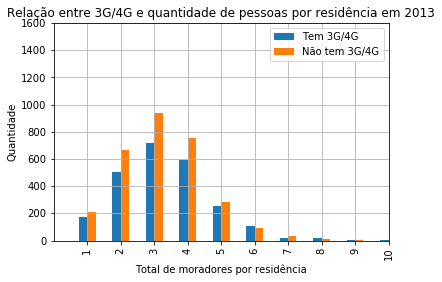

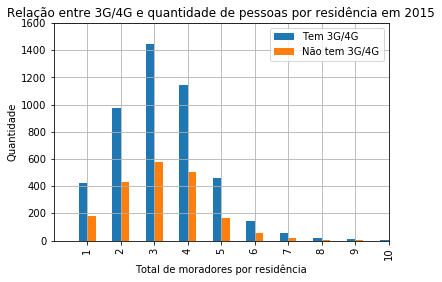

In [13]:
pd.crosstab(dadosres13["Total de moradores"], dadosres13["Internet 3G ou 4G"]).plot(kind="bar")
plt.legend(["Tem 3G/4G", "Não tem 3G/4G"])
plt.xlim(-1,9)
plt.ylim(0,1600)
plt.xlabel("Total de moradores por residência")
plt.ylabel("Quantidade")
plt.title("Relação entre 3G/4G e quantidade de pessoas por residência em 2013")
plt.grid()

pd.crosstab(dadosres15["Total de moradores"], dadosres15["Internet 3G ou 4G"]).plot(kind="bar")
plt.legend(["Tem 3G/4G", "Não tem 3G/4G"])
plt.xlim(-1,9)
plt.ylim(0,1600)
plt.xlabel("Total de moradores por residência")
plt.ylabel("Quantidade")
plt.title("Relação entre 3G/4G e quantidade de pessoas por residência em 2015")
plt.grid()

### 4. Relação da Renda Mensal e o uso de 3G/4G

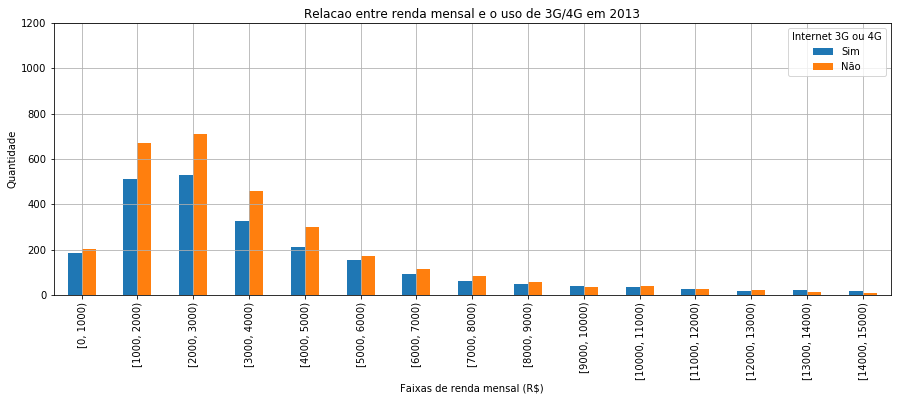

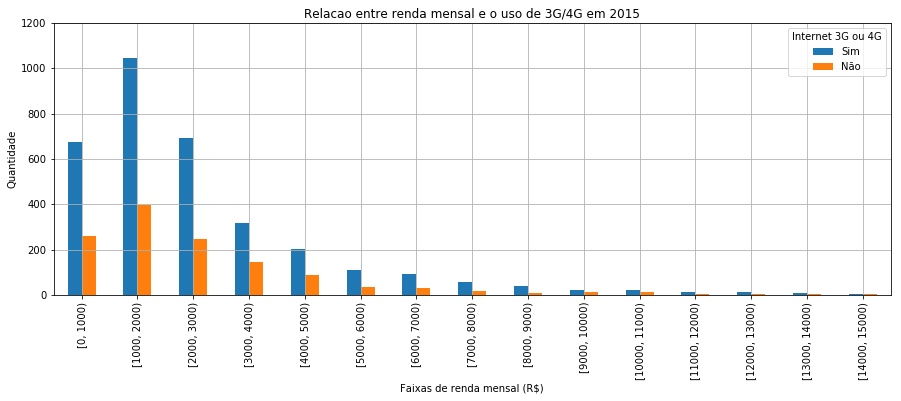

In [14]:
pd.crosstab(rendacut, dadosres13["Internet 3G ou 4G"]).plot(kind="bar", figsize=(15,5), title="Relacao entre renda mensal e o uso de 3G/4G em 2013")
plt.xlabel("Faixas de renda mensal (R$)")
plt.ylabel("Quantidade")
plt.ylim(0, 1200)
plt.grid()

pd.crosstab(rendacut, dadosres15["Internet 3G ou 4G"]).plot(kind="bar", figsize=(15,5), title="Relacao entre renda mensal e o uso de 3G/4G em 2015")
plt.xlabel("Faixas de renda mensal (R$)")
plt.ylabel("Quantidade")
plt.ylim(0, 1200)
plt.grid()

### 5. Relação da Renda Mensal e o uso de banda larga

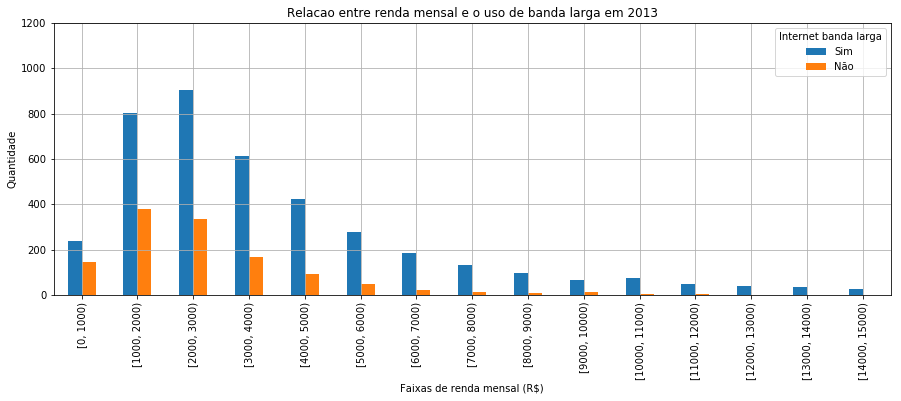

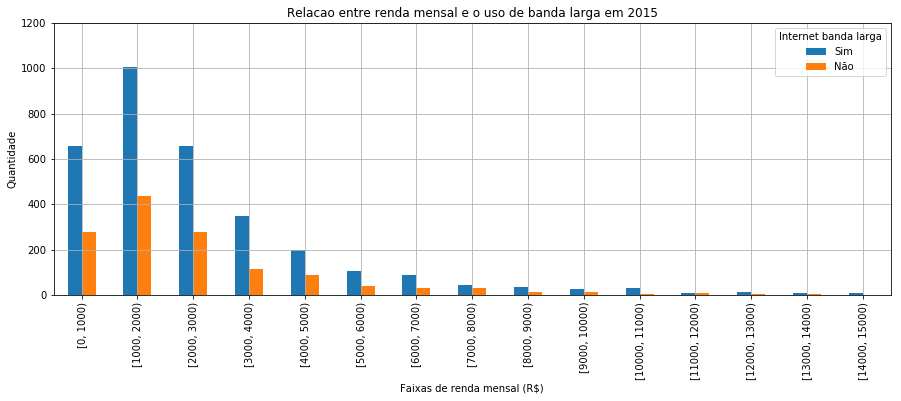

In [15]:
pd.crosstab(rendacut, dadosres13["Internet banda larga"]).plot(kind="bar", figsize=(15,5), title="Relacao entre renda mensal e o uso de banda larga em 2013")
plt.xlabel("Faixas de renda mensal (R$)")
plt.ylabel("Quantidade")
plt.ylim(0,1200)
plt.grid()

pd.crosstab(rendacut, dadosres15["Internet banda larga"]).plot(kind="bar", figsize=(15,5), title="Relacao entre renda mensal e o uso de banda larga em 2015")
plt.xlabel("Faixas de renda mensal (R$)")
plt.ylabel("Quantidade")
plt.ylim(0,1200)
plt.grid()

### 6. Comparação entre o uso de 3G/4G e a Área

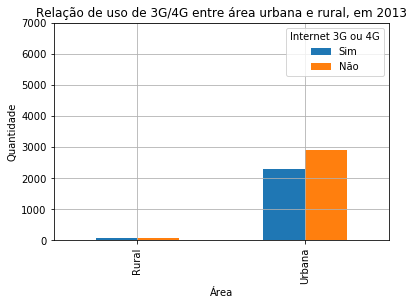

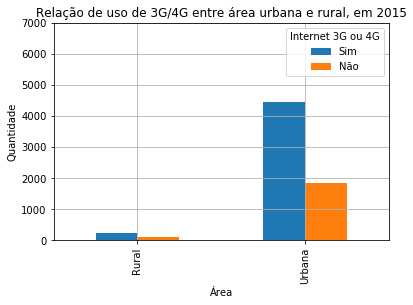

In [16]:
pd.crosstab(dadosres13["Área"], dadosres13["Internet 3G ou 4G"]).plot(kind="bar")
plt.title("Relação de uso de 3G/4G entre área urbana e rural, em 2013")
plt.ylabel("Quantidade")
plt.ylim(0,7000)
plt.grid()

pd.crosstab(dadosres15["Área"], dadosres15["Internet 3G ou 4G"]).plot(kind="bar")
plt.title("Relação de uso de 3G/4G entre área urbana e rural, em 2015")
plt.ylabel("Quantidade")
plt.ylim(0,7000)
plt.grid()

### 7. Comparação entre o uso de Banda larga e a Área

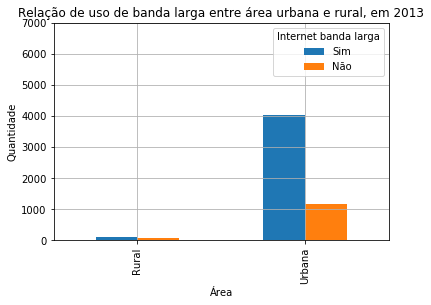

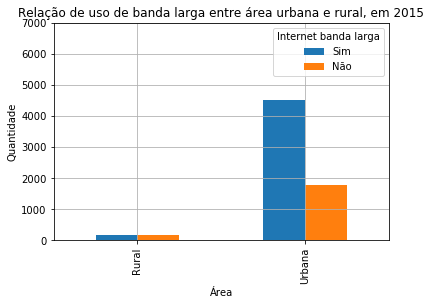

In [17]:
pd.crosstab(dadosres13["Área"], dadosres13["Internet banda larga"]).plot(kind="bar")
plt.title("Relação de uso de banda larga entre área urbana e rural, em 2013")
plt.ylabel("Quantidade")
plt.ylim(0,7000)
plt.grid()

pd.crosstab(dadosres15["Área"], dadosres15["Internet banda larga"]).plot(kind="bar")
plt.title("Relação de uso de banda larga entre área urbana e rural, em 2015")
plt.ylabel("Quantidade")
plt.ylim(0,7000)
plt.grid()

### 8. Comparação entre o uso de 3G/4G e banda larga

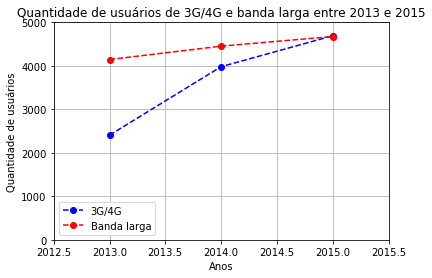

In [18]:
tiponet1 = (dadosres13["Internet 3G ou 4G"].value_counts()[0],\
            dadosres14["Internet 3G ou 4G"].value_counts()[0],\
            dadosres15["Internet 3G ou 4G"].value_counts()[0])
tiponet2 = (dadosres13["Internet banda larga"].value_counts()[0],\
            dadosres14["Internet banda larga"].value_counts()[0],\
            dadosres15["Internet banda larga"].value_counts()[0])

plt.plot(anos, tiponet1, "--bo", anos, tiponet2, "--ro")
plt.legend(["3G/4G", "Banda larga"])
plt.axis([2012.5,2015.5,0,5000])
plt.title("Quantidade de usuários de 3G/4G e banda larga entre 2013 e 2015")
plt.xlabel("Anos")
plt.ylabel("Quantidade de usuários")
plt.grid()

## Conclusões da análise dos dados

Os dados mostram que, dentre os serviços de internet analizados, o 3G/4G é um serviço com um crescimento alto. Na comparação geral entre os tipos de serviço de internet, a quantidade de usuários de 3G/4G ultrapassaram a de banda larga em 2015. Se considerado o tipo de área, a quantidade relativa de usuários de ambos está por volta de 70% na área urbana, porém é possivel notar que na área rural o uso de 3G/4G é levemente maior.

Em relação à quantidade de moradores por residência, é possível notar que o uso de banda larga caiu drasticamente, aproximadamente para a metade em residências de 1 a 5 pessoas entre 2013 e 2015. Em compensação, no mesmo cenário, o uso de 3G/4G dobrou.

Por último, o uso de 3G/4G em relação a renda mensal em 2013 é menor do que a banda larga todas as faixas de renda. Entretanto, em 2015, os níveis de uso de 3G/4G ficam ligeiramente maiores que o uso de banda larga.

Como conclusão pode-se falar que, para um investimento futuro em outro estado, o ideal seria investir em 3G/4G em estados com áreas majoritariamente urbanas, focando mais no público de renda entre R$0 e R$4000 e em residências com 1 a 5 pessoas.